# Анализ продаж игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до декабря 2016 года. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План работы**

- **Шаг 1. Откроем файл с данными и изучим общую информацию**
    - Путь к файлу: /datasets/games.csv


- **Шаг 2. Подготовим данные**
    - Заменим названия столбцов (приведем к нижнему регистру);
    - Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
    - Обработаем пропуски при необходимости:
      - Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
      - Опишем причины, которые могли привести к пропускам;
      - Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать;
    - Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
    
    
- **Шаг 3. Проведем исследовательский анализ данных**
    - Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?;
    - Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?;
    - Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.
    - Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
    - Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
    - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
    - Соотнесем выводы с продажами игр на других платформах.
    - Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    
    
- **Шаг 4. Составим портрет пользователя каждого региона**
    - Определим для пользователя каждого региона (NA, EU, JP):
      - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
      - Самые популярные жанры (топ-5). Поясним разницу.
      - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
      
      
- **Шаг 5. Проверим гипотезы**
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    - Пороговое значение alpha зададим самостоятельно.
    - Поясним:
      - Как мы сформулировали нулевую и альтернативную гипотезы;
      - Какой критерий применили для проверки гипотез и почему.
      
      
- **Шаг 6. Напишем общий вывод**
    - Оформление: Выполним задание в Jupyter Notebook. Заполним программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Применим форматирование и заголовки.

## Обзор данных

Откроем таблицу и посмотрим общую информацию о ней.

In [1]:
# импорт необходимых библиотек
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker
from scipy import stats as st

In [2]:
# чтение файла с данными и сохранение в df
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('C:/Users/tatar/downloads/games.csv')
df.head() # вывод первых 5 строк таблицы

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info() # получение общей информации о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице `df` одиннадцать столбцов. Типы данных в столбцах разные — float64 и object.

Согласно документации к данным:

* `Name` — название игры;
* `Platform` — платформа;
* `Year_of_Release` — год выпуска;
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка  пользователей (максимум 100);
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Проверим таблицу на пропуски и дубликаты.

In [4]:
df.isna().sum() # подсчет пропусков в таблице

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
df.duplicated().sum() # подсчет дубликатов в таблице

0

**Выводы**

* Необходимо заменить названия столбцов, привести их к нижнему регистру;
* Необходимо привести к правильному типу данные в столбцах `Year_of_Release` и `User_Score`;
* Присутствуют пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`;
* Дубликаты отсутствуют.

## Предобработка данных

Заменим названия столбцов, приведём к нижнему регистру.

In [6]:
df.rename(str.lower, axis='columns', inplace=True) # переименование столбцов
df.columns # проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Преобразуем данные в нужные нам типы:

    * в столбце `year_of_release` приведем данные к типу 'int64' (для лучшей читаемости таблицы);
    * в столбце `user_score` приведем данные к типу 'float64' (согласно документации к данным, здесь должна быть числовая оценка до 100).
    
Для начала посмотрим на уникальные значения столбца `user_score`.

In [7]:
df['user_score'].unique() # вывод уникальных значений столбца 'user_score'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди числовых значений столбца `user_score` обнаружены значения **tbd**, что означет **to be determined** или **подлежит определению**. Такое возможно, когда в данный момент рейтинг не определен. Логичнее всего заменить эти значения на Nan.

In [8]:
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True) # замена 'tbd' на 'nan' в столбце 'user_score'
df['user_score'].unique() # проверка

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Теперь можно произвести запланированную замену типа данных в столбце `user_score`.

In [9]:
df['user_score'] = df['user_score'].astype('float') # изменение типа данных в столбце 'user_score'
df['user_score'].dtype # проверка

dtype('float64')

Для изменения типа данных в столбце `year_of_release` необходимо сначала разобраться с пропусками. Пропуски здесь могли возникнуть при автоматическом заполнении датафрейма. Можно было бы попробовать заполнить пропуски исходя из названий игр и платформ, на которых они выходили. Однако, как показывает практика некоторые игры могут выходить в разные годы на разных платформах. Вычислим долю пропусков в столбце `year_of_release` от общего количества данных.

In [10]:
print('Доля пропусков в столбце \'year_of_release\' составляет:', round((df['year_of_release'].isna().sum() 
                                                                         / len(df['year_of_release']) * 100), 2), '%')

Доля пропусков в столбце 'year_of_release' составляет: 1.61 %


Учитывая это, можно эти пропуски удалить.

In [11]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True) # удаление пропусков в столбце 'year_of_release'
df['year_of_release'].isna().sum() # проверка

0

Теперь можно произвести запланированную замену типа данных в столбце `year_of_release`.

In [12]:
df['year_of_release'] = df['year_of_release'].astype('int') # изменение типа данных в столбце 'user_score'
df.head() # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Перейдем к обработке пропусков в датафрейме. Посмотрим на строки с пропущенными значениями в столбцах `name` и `genre`.

In [13]:
df[(df['name'].isna()) & (df['genre'].isna())] # вывод строк с пропущенными значениями

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти строки можно удалить.

In [14]:
df = df.dropna(subset=['name']).reset_index(drop=True) # удаление пропусков в столбцах 'name' и 'genre'
df.isna().sum() # проверка

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Пропуски в столбцах `critic_score`, `user_score` и `rating` могли возникнуть при импорте данных с других источников. Рейтинги относятся к субъективным оценкам, зависящим от множества факторов и заполнить эти пропуски в данных на данном этапе не представляется возможным. Единственное, здесь можно заменить пропуски в столбце `rating` на **tbd** для полноты дальнейших исследований, тем более в этом столбце значения имеют тип строковых данных, не числовых.

In [15]:
df['rating'] = df['rating'].fillna('tbd') # замена пропусков на 'tbd' в столбце 'rating'
df['rating'].value_counts() # проверка

tbd     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [16]:
# добавление столбца с расчетом суммарных продаж
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] 
df.head() # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,tbd,31.38


**Выводы**

Таким образом, мы сделали следующее:
* Заменили названия столбцов, привели их к нижнему регистру;
* Привели к правильному типу данные в столбцах `Year_of_Release` и `User_Score`;
* Обработали пропущенные значения в столбцах `Name`, `Year_of_Release` и `Genre`;
* Посчитали и занесли в датафрейм данные по суммарным продажам.

## Исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы. Определим, важны ли данные за все периоды. Для этого построим график на базе сводной таблицы. 

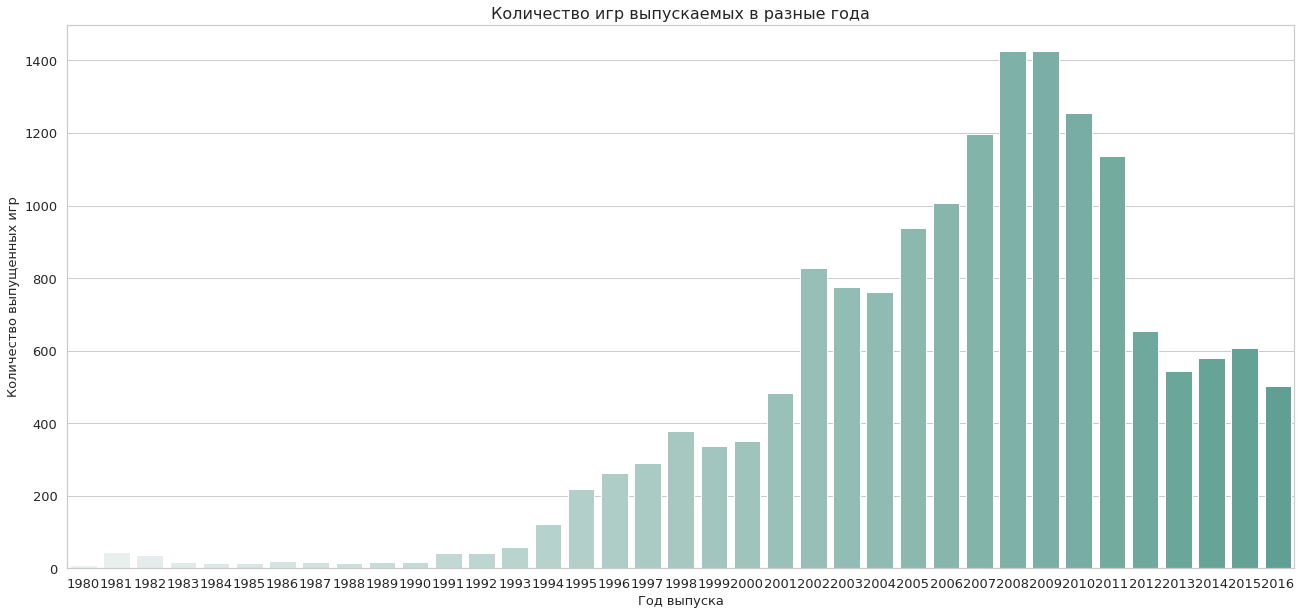

In [17]:
# формирование сводной таблицы
games_by_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_by_year.columns = ['count']

# построение столбчатой диаграммы
plt.figure(figsize=(22,10))
sns.set_theme(style='whitegrid')
sns.barplot(x=games_by_year.index, y='count', data=games_by_year, palette='light:#5A9')
plt.title('Количество игр выпускаемых в разные года', fontsize=16)
plt.tick_params(labelsize=13)
plt.xlabel('Год выпуска', fontsize=13)
plt.ylabel('Количество выпущенных игр', fontsize=13)
plt.show()

Из графика видно, что:

* количество игр на игровые приставки и компьютеры начало расти с 1991 до 2008 года;
* с 2008 года прослеживается спад количества консольных игр, предположительно с началом роста популярности мобильных платформ;
* данные до 1991 года могут быть не так интересны для настоящего анализа из-за малого количества выпущенных игр.

Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы.

Для начала определим платформы-лидеры по объемам продаж.

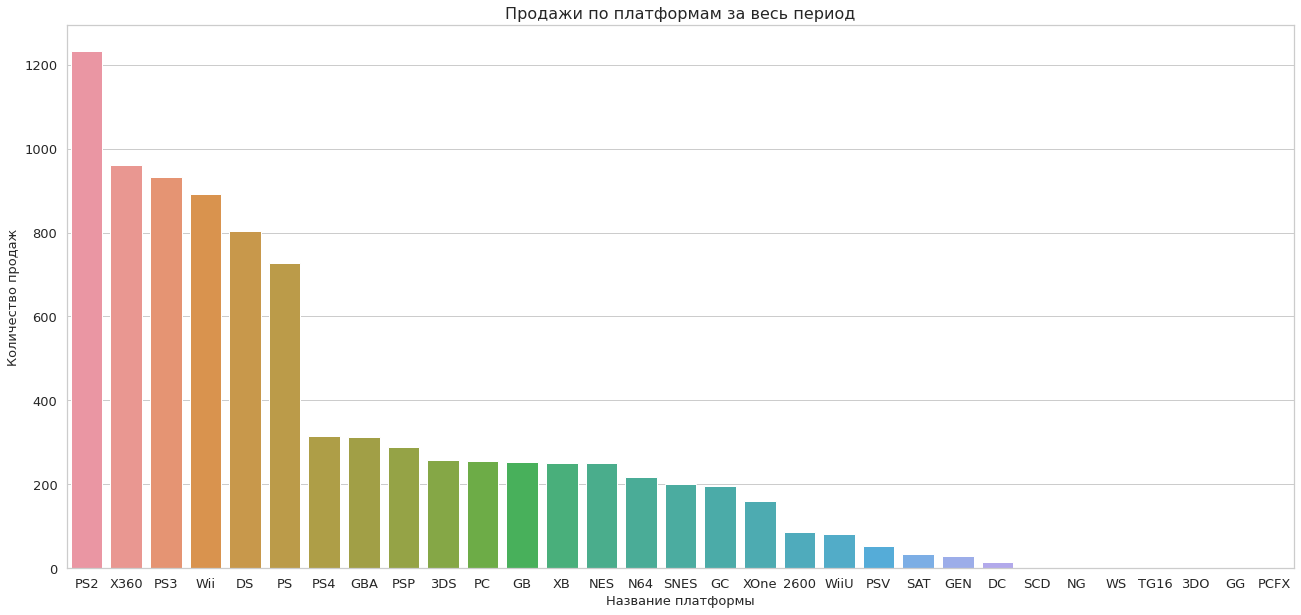

In [18]:
# формирование сводной таблицы
games_by_platform = (
    df
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

# построение столбчатой диаграммы
plt.figure(figsize=(22,10))
sns.barplot(x=games_by_platform.index, y='total_sales', data=games_by_platform)
plt.title('Продажи по платформам за весь период', fontsize=16)
plt.tick_params(labelsize=13)
plt.xlabel('Название платформы', fontsize=13)
plt.ylabel('Количество продаж', fontsize=13)
plt.show()

График показывает, что самые популярные платформы за все время это Sony PlayStation 2, Microsoft Xbox360, Sony PlayStation 3, Nintendo Wii и Nintendo DS.

Сформируем сводную таблицу и выведем значения по продажам топ-5 платформ.

In [19]:
top_5_platforms = (
    df
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head()
    .reset_index()
)
top_5_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


Теперь построим распределение суммарных продаж топ-5 платформ по годам до 1991 года.

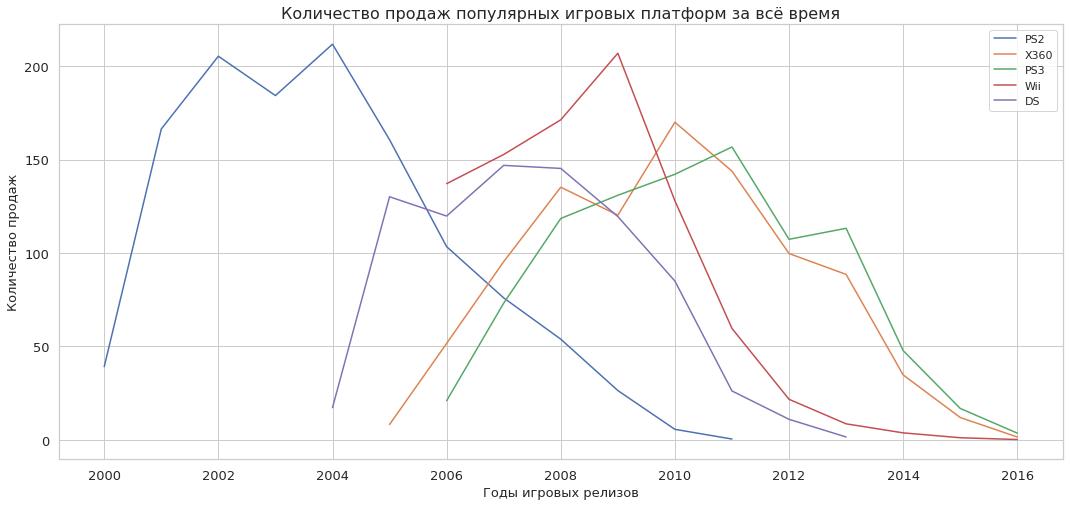

In [20]:
# сформируем функцию, которая будет возвращать сводную таблицу
def top_5_platforms_by_year(name, data):
    total = (
        data
        .loc[(data['platform'] == name) & (data['year_of_release'] > 1991)]
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .sort_values('year_of_release', ascending=False)
    )
    return total

# построение графика       
plt.figure(figsize=(18,8))
plt.title('Количество продаж популярных игровых платформ за всё время', fontsize=16)
plt.tick_params(labelsize=13)
plt.xlabel('Годы игровых релизов', fontsize=13)
plt.ylabel('Количество продаж', fontsize=13)
for i in list(top_5_platforms['platform']):
    sns.lineplot(data=top_5_platforms_by_year(i,df)['total_sales'], label=i)
    plt.legend()
plt.show()

Выясним сколько в среднем существуют платформы. Для этого сгруппируем исходный датафрейм по платформам и годам выпуска игр,  затем посчитаем количество лет и выведем характерные значения.

In [21]:
# группировка исходного датафрейма
platforms_by_year = (
    df
    .groupby(['platform', 'year_of_release'])
    .agg({'total_sales':'sum'})
    .reset_index()
) 
display(platforms_by_year['platform'].value_counts()) # вывод количества лет жизни каждой платформы
print('Среднее количество лет жизни каждой платформы:', round(platforms_by_year['platform'].value_counts().mean(), 2), 'лет') 

PC      26
GB      13
NES     12
PSP     12
PS2     12
X360    12
DS      11
PS3     11
Wii     11
PS      10
2600    10
SNES    10
XB       9
GBA      8
N64      7
DC       7
GC       7
3DS      6
PSV      6
SAT      6
GEN      5
WiiU     5
PS4      4
NG       4
XOne     4
WS       3
SCD      2
3DO      2
GG       1
PCFX     1
TG16     1
Name: platform, dtype: int64

Среднее количество лет жизни каждой платформы: 7.68 лет


Мы выяснили, что:

* самые популярные платформы за все время это Sony PlayStation 2, Microsoft Xbox360, Sony PlayStation 3, Nintendo Wii и Nintendo DS;
* продажи растут на протяжении 3-5 лет, потом неизбежно падение спроса, с большой долей вероятности из-за появления новых, более совершенных платформ;
* среднее количество лет жизни платформы почти 8 лет.

Выберем 5 наиболее прибыльных платформ за период с 2013 по 2016 год. Период выбран исходя из среднего количества лет жизни  платформы и того факта, что примерно 4 года происходит и рост и падение продаж. Эти данные должны помочь построить прогноз на 2017 год.

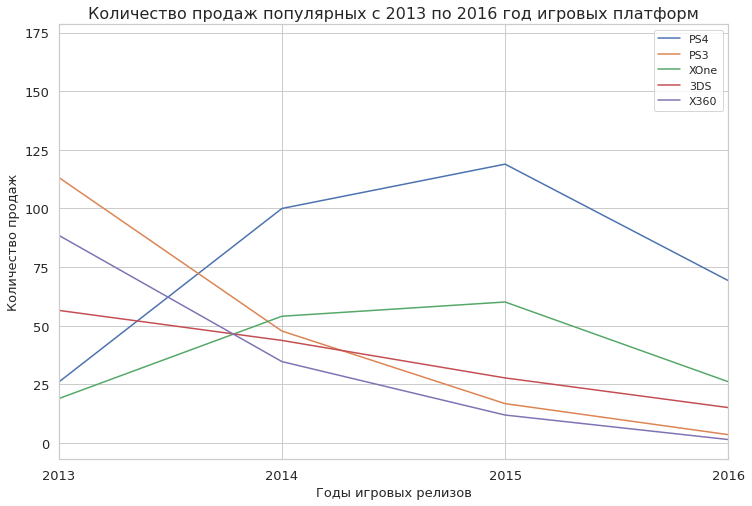

In [22]:
# формирование сводной таблицы
top_5_platforms_by_sales = (
    df
    .loc[df['year_of_release'] >= 2013]
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False).head().reset_index()
)

# построение графика       
plt.figure(figsize=(12,8))
plt.title('Количество продаж популярных с 2013 по 2016 год игровых платформ', fontsize=16)
plt.tick_params(labelsize=13)
plt.xlabel('Годы игровых релизов', fontsize=13)
plt.ylabel('Количество продаж', fontsize=13)
for i in list(top_5_platforms_by_sales['platform']):
    g = sns.lineplot(data=top_5_platforms_by_year(i,df)['total_sales'], label= i)
    plt.legend()
g.set(xlim=(2013, 2016))
locator = matplotlib.ticker.FixedLocator([2013, 2014, 2015, 2016])
g.xaxis.set_major_locator(locator)
plt.show()

Ситуация за последние 4 года несколько иная, самые популярные платформы поменялись и теперь это Sony PlayStation 4, Sony PlayStation 3, Microsoft Xbox One, Nintendo 3DS и Microsoft Xbox360.

Построим график «ящик с усами» (диаграмму размаха) по глобальным продажам игр в разбивке по платформам.

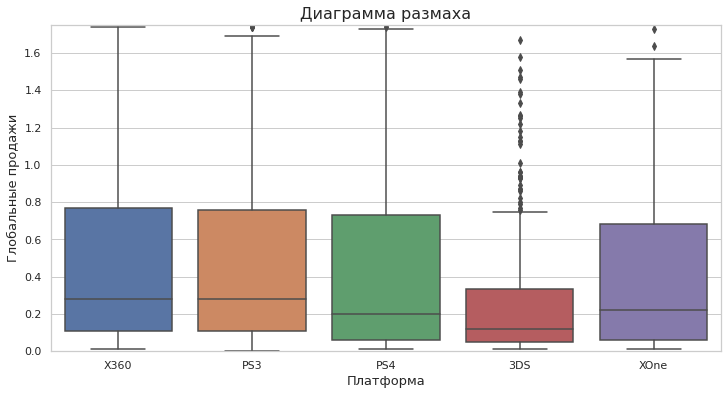

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,512.0,0.503535,1.441271,0.01,0.05,0.12,0.3325,14.60
PS3,1306.0,0.713124,1.403065,0.00,0.11,0.28,0.7600,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
X360,1232.0,0.780227,1.632122,0.01,0.11,0.28,0.7700,21.82
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


In [23]:
# сохраним в переменной df_top_5_platforms иформацию по топ-5 платформ с 2013 по 2016 год
list_of_top_5 = list(top_5_platforms_by_sales['platform'])
df_top_5_platforms = df[df['platform'].isin(list_of_top_5)]

# построение диграммы размаха
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='total_sales')
plt.title('Диаграмма размаха', fontsize=16)
plt.xlabel('Платформа', fontsize=13)
plt.ylabel('Глобальные продажи', fontsize=13)
plt.ylim(0, 1.75)
plt.show()

# вывод характерных значений по глобальным продажам игр в разбивке по платформам
df_top_5_platforms.groupby('platform')['total_sales'].describe()

Мы выяснили, что:

* за последние 4 года самыми популярными платформами стали Sony PlayStation 4, Sony PlayStation 3, Microsoft Xbox One, Nintendo 3DS и Microsoft Xbox360;
* в своей активной коммерческой фазе пребывает платформа Sony PlayStation 4, тогда как лидеры по продажам 2013 года: Sony PlayStation 3 и Microsoft Xbox360, — к 2016 году уже исчерпали свой коммерческий ресурс;
* продажи в разрезе платформ в топ-5 протекают похоже (схожие значения медианы, среднего значения и стандартного отклонения), за исключением Nintendo 3DS.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем для примера Sony PlayStation 2, как относительно недавнюю платформу, которая прошла полный жизненный цикл. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

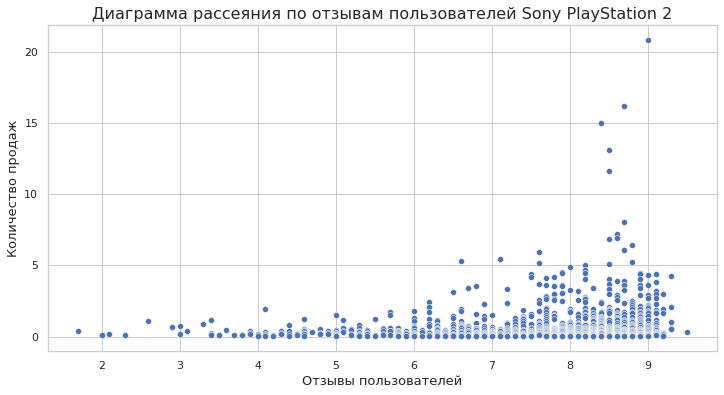

Корреляция между отзывами пользователей и продажами: 0.18


In [24]:
# сформируем вспомогательный датафрейм
ps_2 = df[df['platform'] == 'PS2']

# построим диаграмму рассеяния по отзывам пользователей
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=ps_2)
plt.title('Диаграмма рассеяния по отзывам пользователей Sony PlayStation 2', fontsize=16)
plt.xlabel('Отзывы пользователей', fontsize=13)
plt.ylabel('Количество продаж', fontsize=13)
plt.show()

print('Корреляция между отзывами пользователей и продажами:', round(ps_2['user_score'].corr(ps_2['total_sales']), 2))

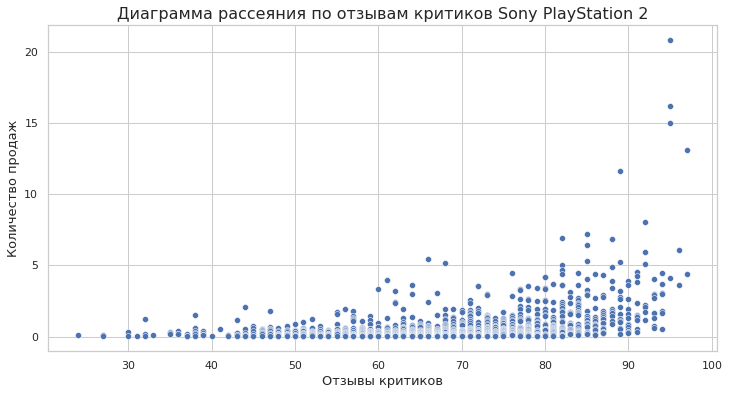

Корреляция между отзывами критиков и продажами: 0.39


In [25]:
# построим диаграмму рассеяния по отзывам критиков
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps_2)
plt.title('Диаграмма рассеяния по отзывам критиков Sony PlayStation 2', fontsize=16)
plt.xlabel('Отзывы критиков', fontsize=13)
plt.ylabel('Количество продаж', fontsize=13)
plt.show()

print('Корреляция между отзывами критиков и продажами:', round(ps_2['critic_score'].corr(ps_2['total_sales']), 2))

Можно сделать вывод, что отзывы пользователей и критиков незначительно влияют на продажи платформы Sony PlayStation 2. Влияние отзывов критиков выше влияния отзывов пользователей.

Посмотрим на взаимосвязи внутри платформ из топ-5 за период с 2013 по 2016 год.

In [26]:
# сформируем функцию, которая будет отрисовывать графики и выводить значения корреляции
def other_platform_matrix(name_of_platform):
    platform = df[df['platform'] == name_of_platform]
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=16)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    user_correl = round(abs(platform['user_score'].corr(platform['total_sales'])), 2)
    critic_correl = round(abs(platform['critic_score'].corr(platform['total_sales'])), 2)
    
    if 0.3 >= critic_correl >= 0:
        print('Корреляция между отзывами критиков и продажами', name_of_platform.upper(), ': очень слабая', critic_correl)
    if 0.5 >= critic_correl > 0.3:
        print('Корреляция между отзывами критиков и продажами', name_of_platform.upper(), ': слабая', critic_correl)
    if 0.7 >= critic_correl > 0.5:
        print('Корреляция между отзывами критиков и продажами', name_of_platform.upper(), ': средняя', critic_correl)
    if 0.9 >= critic_correl > 0.7:
        print('Корреляция между отзывами критиков и продажами', name_of_platform.upper(), ': высокая', critic_correl)
    if 1 >= critic_correl > 0.9:
        print('Корреляция между отзывами критиков и продажами', name_of_platform.upper(), ': очень высокая', critic_correl)
        
    if 0.3 >= user_correl >= 0:
        print('Корреляция между отзывами пользователей и продажами', name_of_platform.upper(), ': очень слабая', user_correl)
    if 0.5 >= user_correl > 0.3:
        print('Корреляция между отзывами пользователей и продажами', name_of_platform.upper(), ': слабая', user_correl)
    if 0.7 >= user_correl > 0.5:
        print('Корреляция между отзывами пользователей и продажами', name_of_platform.upper(), ': средняя', user_correl)
    if 0.9 >= user_correl > 0.7:
        print('Корреляция между отзывами пользователей и продажами', name_of_platform.upper(), ': высокая', user_correl)
    if 1 >= user_correl > 0.9:
        print('Корреляция между отзывами пользователей и продажами', name_of_platform.upper(), ': очень высокая', user_correl)
    print('\n')

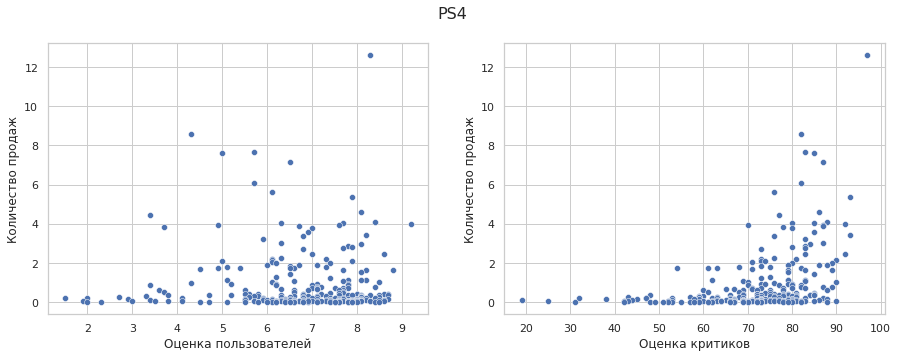

Корреляция между отзывами критиков и продажами PS4 : слабая 0.41
Корреляция между отзывами пользователей и продажами PS4 : очень слабая 0.03




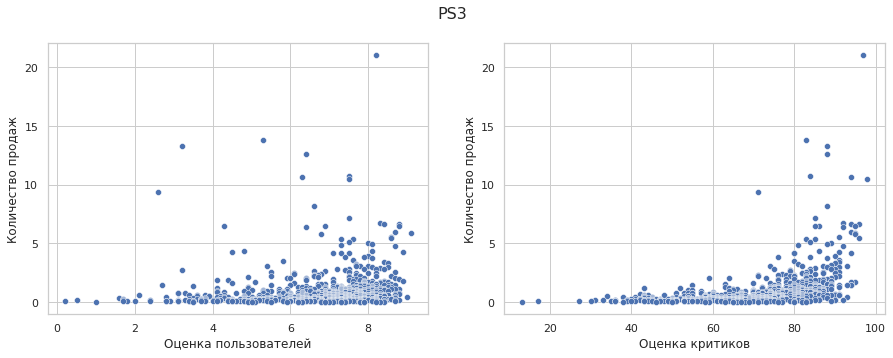

Корреляция между отзывами критиков и продажами PS3 : слабая 0.43
Корреляция между отзывами пользователей и продажами PS3 : очень слабая 0.13




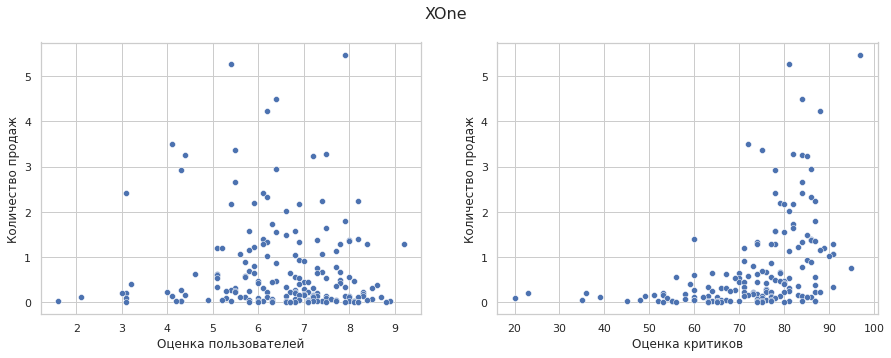

Корреляция между отзывами критиков и продажами XONE : слабая 0.42
Корреляция между отзывами пользователей и продажами XONE : очень слабая 0.07




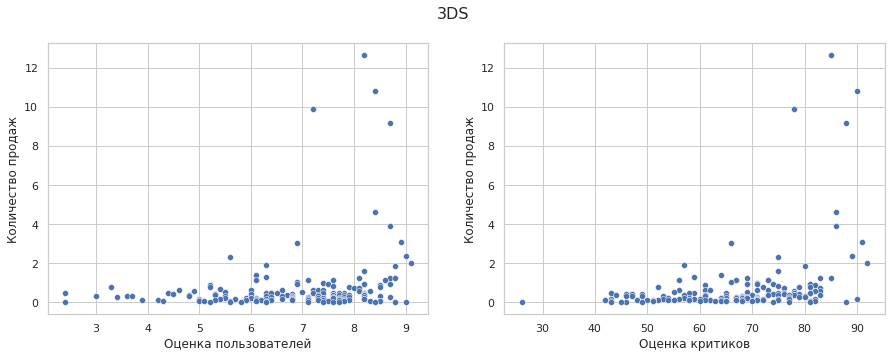

Корреляция между отзывами критиков и продажами 3DS : слабая 0.35
Корреляция между отзывами пользователей и продажами 3DS : очень слабая 0.22




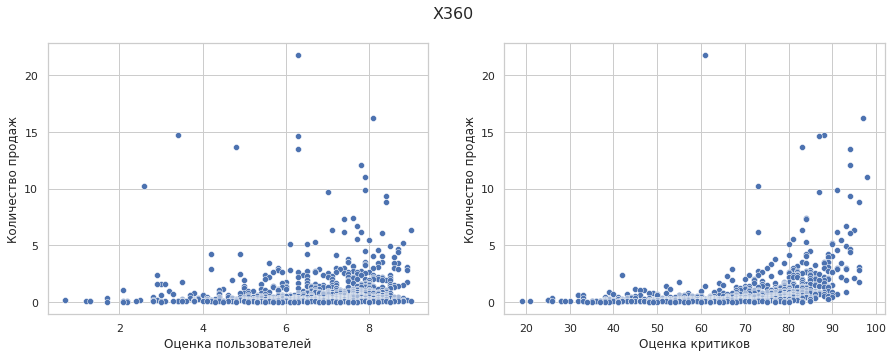

Корреляция между отзывами критиков и продажами X360 : слабая 0.39
Корреляция между отзывами пользователей и продажами X360 : очень слабая 0.11




In [27]:
# c помощью цикла выведем все 5 графиков
for platform in list_of_top_5:
    other_platform_matrix(platform)

Мы выяснили, что:

* корреляция между отзывами и продажами слабая либо очень слабая, то есть продажи не сильно зависят от оценок пользователей и критиков;
* покупатели прислушиваются больше к критикам чем к оценкам других пользователей.

Посмотрите на общее распределение игр по жанрам и выясним какие из них самые прибыльные.

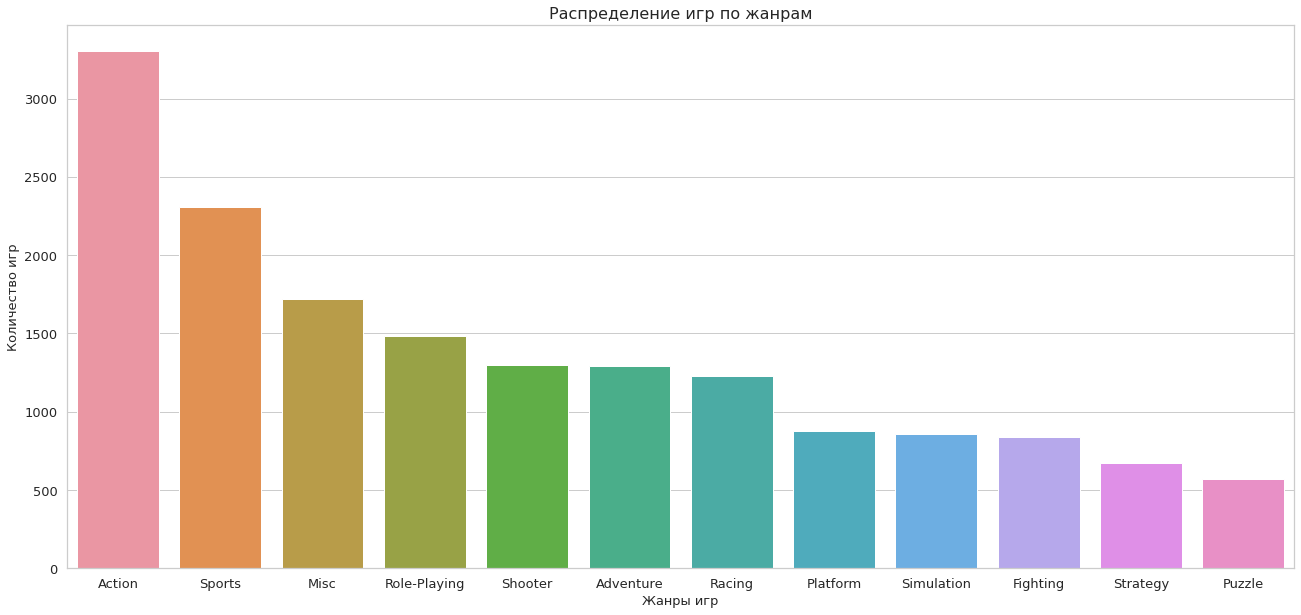

In [28]:
# формирование сводной таблицы
genre_by_number = (
    df
    .pivot_table(index='genre', values='name', aggfunc='count')
    .sort_values(by='name', ascending=False)
)

# построение столбчатой диаграммы
plt.figure(figsize=(22,10))
sns.barplot(x=genre_by_number.index, y='name', data=genre_by_number)
plt.title('Распределение игр по жанрам', fontsize=16)
plt.tick_params(labelsize=13)
plt.xlabel('Жанры игр', fontsize=13)
plt.ylabel('Количество игр', fontsize=13)
plt.show()

Топ-5 жанров по количеству игр:

* Action;
* Sports;
* Misc;
* Role-Playing;
* Shooter.

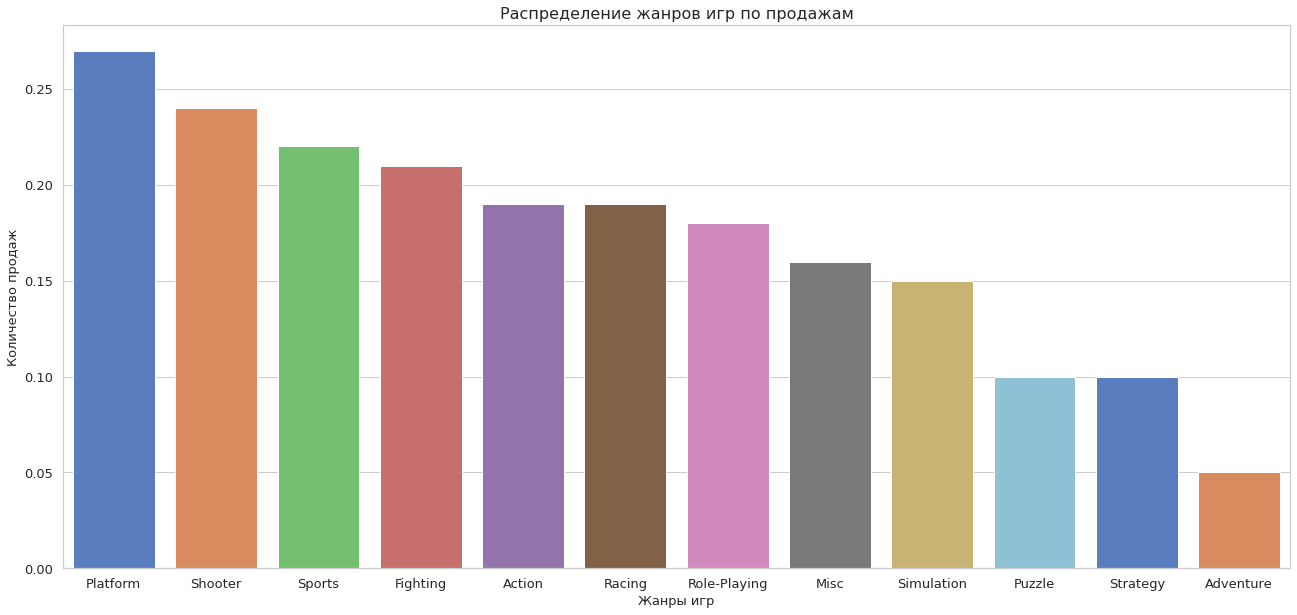

In [29]:
# формирование сводной таблицы
genre_by_sales = (
    df
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales', ascending=False)
)

# построение столбчатой диаграммы
plt.figure(figsize=(22,10))
sns.barplot(x=genre_by_sales.index, y='total_sales', data=genre_by_sales, palette='muted')
plt.title('Распределение жанров игр по продажам', fontsize=16)
plt.tick_params(labelsize=13)
plt.xlabel('Жанры игр', fontsize=13)
plt.ylabel('Количество продаж', fontsize=13)
plt.show()

Топ-5 жанров по продажам:

* Platform;
* Shooter;
* Sports;
* Fighting;
* Action.

**Выводы**

В ходе исследовательского анализа данных удалось выяснить следующее:
* Количество игр на игровые приставки и компьютеры непрерывно расло с 1991 до 2008 года, далее прослеживается спад количества консольных игр, предположительно с началом роста популярности мобильных платформ;
* Самыми популярными платформами за все время оказались Sony PlayStation 2, Microsoft Xbox360, Sony PlayStation 3, Nintendo Wii и Nintendo DS;
* Среднее количество лет жизни игровой платформы почти 8 лет, из которых половину срока продажи растут;
* За последние 4 года самыми популярными платформами стали Sony PlayStation 4, Sony PlayStation 3, Microsoft Xbox One, Nintendo 3DS и Microsoft Xbox360;
* Продажи в разрезе платформ в топ-5 протекают похоже;
* Продажи не сильно зависят от оценок пользовтелей и критиков;
* Самые продаваемые и самые распространенные жанры это Action, Sport и Shooter. 
* Самые непродаваемые и малочисленные по количеству игр жанры это Simulation, Puzzle и Strategy.

## Составление портрета пользователей каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5);
* Самые популярные жанры (топ-5);
* Влияние рейтинга ESRB на продажи.

Данные будем брать за актуальный период (с 2013 по 2016 годы).

In [30]:
# сформируем функцию, которая будет отрисовывать столбчатые диаграммы и выводить сводные таблицы с показателями
def forpivot(row, title):
    fig, ax = plt.subplots(1, 1)
    for pivot in list(['platform','genre','rating']):
        ppivot = (
            df
            .loc[df['year_of_release'] >= 2013] 
            .pivot_table(index=pivot, values=row, aggfunc='sum')
            .sort_values(by=row, ascending=False)
            .head()
        )
        ppivot['ratio'] = round(ppivot[row] / ppivot[row].sum(), 2)
                        
        sns.set_palette('Set3')
        sns.barplot(data=ppivot, x=ppivot.index, y=row)
        fig.suptitle(title, fontsize=14)
        plt.show()
        print(ppivot)

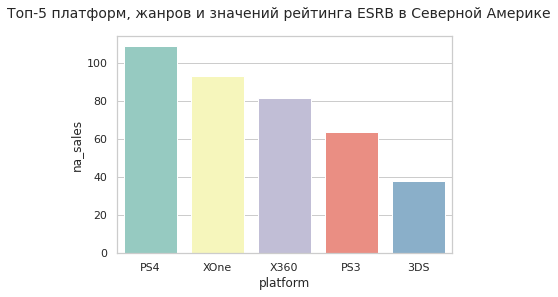

          na_sales  ratio
platform                 
PS4         108.74   0.28
XOne         93.12   0.24
X360         81.66   0.21
PS3          63.50   0.16
3DS          38.20   0.10


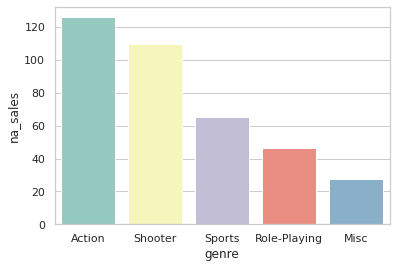

              na_sales  ratio
genre                        
Action          126.05   0.34
Shooter         109.74   0.29
Sports           65.27   0.17
Role-Playing     46.40   0.12
Misc             27.49   0.07


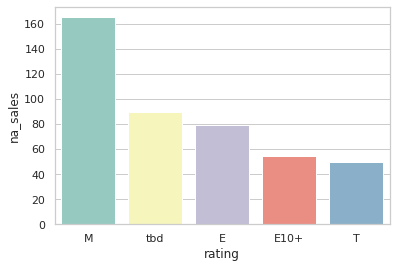

        na_sales  ratio
rating                 
M         165.21   0.38
tbd        89.42   0.20
E          79.05   0.18
E10+       54.24   0.12
T          49.79   0.11


In [31]:
forpivot('na_sales','Топ-5 платформ, жанров и значений рейтинга ESRB в Северной Америке')

**Портрет пользователя из Северной Америки**

* Самые популярные платформы это Sony PlayStation 4, Microsoft Xbox One, Microsoft Xbox360, Sony PlayStation 3 и Nintendo 3DS;
* Самые популярные жанры это Action, Shooter, Sports, Role-Playing и Misc;
* Самые популярные игры по рейтингу ESRB это «M» («Mature») — «Для взрослых», «Игры без рейтинга», «E» («Everyone») — «Для всех», «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» и «T» («Teen») — «Подросткам».

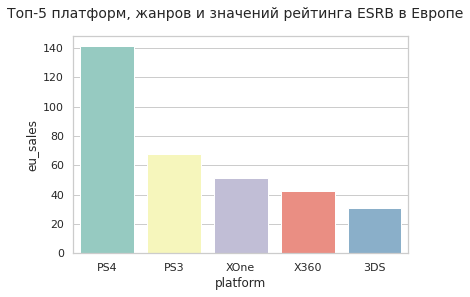

          eu_sales  ratio
platform                 
PS4         141.09   0.42
PS3          67.81   0.20
XOne         51.59   0.15
X360         42.52   0.13
3DS          30.96   0.09


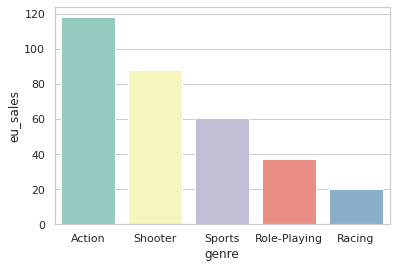

              eu_sales  ratio
genre                        
Action          118.13   0.36
Shooter          87.86   0.27
Sports           60.52   0.19
Role-Playing     36.97   0.11
Racing           20.19   0.06


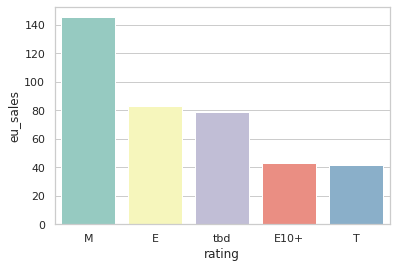

        eu_sales  ratio
rating                 
M         145.32   0.37
E          83.36   0.21
tbd        78.91   0.20
E10+       42.69   0.11
T          41.95   0.11


In [32]:
forpivot('eu_sales','Топ-5 платформ, жанров и значений рейтинга ESRB в Европе')

**Портрет пользователя из Европы**

* Самые популярные платформы это Sony PlayStation 4, Sony PlayStation 3, Microsoft Xbox One, Microsoft Xbox360 и Nintendo 3DS;
* Самые популярные жанры это Action, Shooter, Sports, Role-Playing и Racing;
* Самые популярные игры по рейтингу ESRB это «M» («Mature») — «Для взрослых», «E» («Everyone») — «Для всех», «Игры без рейтинга», «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» и «T» («Teen») — «Подросткам».

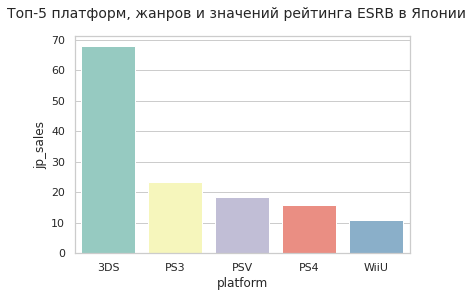

          jp_sales  ratio
platform                 
3DS          67.81   0.50
PS3          23.35   0.17
PSV          18.59   0.14
PS4          15.96   0.12
WiiU         10.88   0.08


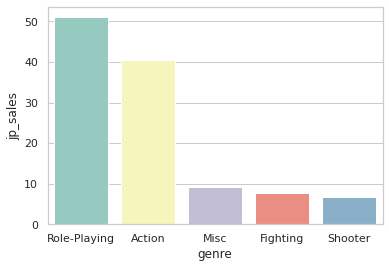

              jp_sales  ratio
genre                        
Role-Playing     51.04   0.44
Action           40.49   0.35
Misc              9.20   0.08
Fighting          7.65   0.07
Shooter           6.61   0.06


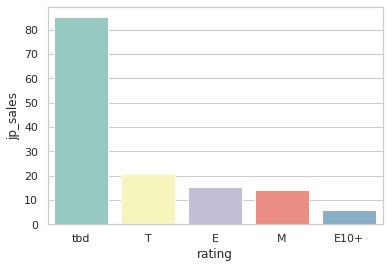

        jp_sales  ratio
rating                 
tbd        85.05   0.60
T          20.59   0.15
E          15.14   0.11
M          14.11   0.10
E10+        5.89   0.04


In [33]:
forpivot('jp_sales','Топ-5 платформ, жанров и значений рейтинга ESRB в Японии')

**Портрет пользователя из Японии**

* Самые популярные платформы это Nintendo 3DS, Sony PlayStation 3, Sony PlayStation Vita, Sony PlayStation 4 и Nintendo Wii U;
* Самые популярные жанры это Role-Playing, Action, Misc, Fighting и Shooter;
* Самые популярные игры по рейтингу ESRB это «Игры без рейтинга», «T» («Teen») — «Подросткам», «E» («Everyone») — «Для всех», «M» («Mature») — «Для взрослых» и «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

**Выводы**

В ходе составления портретов пользователей из разных регионов удалось выяснить, что:
* В топе самых популярных платформ и в Северной Америке, и в Европе одни и те же приставки, но есть разница в долях продаж. В Северной Америке традиционно сильны позиции локального бренда Microsoft, поэтому в топ-3 распределение продаж между Sony PS 4 (самая свежая приставка) и XboxOne c Xbox360 приблизительно равное. В Европе же Sony PS 4 занимает значительную часть рынка. Что касается Японии, то здесь популярна больше продукция корпорации Nintendo, на 2 приставки приходится больше половины продаж. Из интересных особенностей, продажи новой Sony PS 4 занимают предпоследнее место в топ-5. Можно сделать вывод, что японцы любят старые платформы и продолжают покупать игры на них;
* По жанрам ситуация в Северной Америке и в Европе очень схожа, топ-4 совпадает, вплоть до долей продаж. Это Action, Shooter, Sports и Role-Playing. Япония снова выделяется, на 2 жанра Role-Playing и Action приходится значительная часть рынка, также в топе присутствует нехарактерный для топ-листов других регионов жанр Fighting;
* По значениям рейтинга ESRB ситуация идентична ситуации с жанрами. В Северной Америке и в Европе картина одинаковая, вплоть до долей продаж. Это «M» («Mature») (лидирует с большим отрывом), «E» («Everyone»), «Игры без рейтинга», «E10+» («Everyone 10 and older») и «T» («Teen»). В Японии же порядок совсем другой, на «Игры без рейтинга» приходится большая часть продаж, на «T» («Teen»), «E» («Everyone») и «M» («Mature») приходятся приблизительно равные доли рынка, замыкает топ «E10+» («Everyone 10 and older»).

## Проверка гипотез

Нам необходимо проверить гипотезы:

    * средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * средние пользовательские рейтинги жанров Action и Sports разные.
    
Для начала нам необходимо сформулировать нулевую и альтернативную гипотезы для каждой из гипотез для их проверки.

### Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

В данном конкретном случае нам необходимо сравнить среднее двух совокупностей между собой. Можно сформулировать гипотезы следующим образом:

    * H₀ - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * H₁ - средние пользовательские рейтинги платформ Xbox One и PC различаются.
    
Используем проверку гипотезы о равенстве средних двух генеральных совокупностей. Пороговое значение alpha установим равным 0.05. Для начала сформируем вспомогательные датфреймы по платформам Xbox One и PC, с условием даты выхода с 2013 года (год выхода Xbox One, это будет более релевантно) и удалим пропущенные значения пользовательских рейтингов из них.

In [34]:
df_xbox_one = df.loc[(df['platform'] == 'XOne') & (df['year_of_release'] >= 2013)]
df_xbox_one = df_xbox_one.dropna(subset=['user_score'])
df_pc = df.loc[(df['platform'] == 'PC') & (df['year_of_release'] >= 2013)]
df_pc = df_pc.dropna(subset=['user_score'])

Теперь нам необходимо проверить значения дисперсий, чтобы установить параметр "равной дисперсии".

In [35]:
print('Дисперсия пользовательских рейтингов платформы Xbox One:', 
      round(np.var(df_xbox_one['user_score']), 2))
print('Дисперсия пользовательских рейтингов платформы PC:', 
      round(np.var(df_pc['user_score']), 2))

Дисперсия пользовательских рейтингов платформы Xbox One: 1.9
Дисперсия пользовательских рейтингов платформы PC: 3.02


Так как значения дисперсий разные, примем параметр `equal_var = False`.

In [36]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(df_xbox_one['user_score'], df_pc['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')    

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


По результатам теста видно, что полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно велико. Следовательно средние пользовательские рейтинги платформ Xbox One и PC различаются незначительно. То есть, с вероятностью в 14.7 % можно получить различность рейтингов двух платформ.

### Средние пользовательские рейтинги жанров Action и Sports разные

В этом случае нам также необходимо сравнить среднее двух совокупностей между собой. Можно сформулировать гипотезы следующим образом:

    * H₀ - средние пользовательские рейтинги жанров Action и Sports одинаковые;
    * H₁ - средние пользовательские рейтинги жанров Action и Sports различаются.
    
Используем проверку гипотезы о равенстве средних двух генеральных совокупностей. Пороговое значение alpha установим равным 0.05. Для начала сформируем вспомогательные датфреймы по жанрам Action и Sports за актуальный период и удалим пропущенные значения из них.

In [37]:
df_action = df.loc[(df['genre'] == 'Action') & (df['year_of_release'] >= 2013)]
df_action = df_action.dropna(subset=['user_score'])
df_sports = df.loc[(df['genre'] == 'Sports') & (df['year_of_release'] >= 2013)]
df_sports = df_sports.dropna(subset=['user_score'])

Теперь нам необходимо проверить значения дисперсий, чтобы установить параметр "равной дисперсии".

In [38]:
print('Дисперсия пользовательских рейтингов жанра Action:', 
      round(np.var(df_action['user_score']), 2))
print('Дисперсия пользовательских рейтингов жанра Sports:', 
      round(np.var(df_sports['user_score']), 2))

Дисперсия пользовательских рейтингов жанра Action: 1.76
Дисперсия пользовательских рейтингов жанра Sports: 3.16


Так как значения дисперсий разные, примем параметр `equal_var = False`.

In [39]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


По результатам теста видно, что полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно велико. Следовательно средние пользовательские рейтинги жанров Action и Sports отличаются, с вероятностью 99.9 %.

## Выводы

Основной задачей исследования было спланировать рекламные кампании, опираясь на результаты анализа данных о продажах игр. 

Для проведения корректного анализа, пришлось обработать имеющиеся данные:

* заменить названия столбцов, привести их к нижнему регистру;
* привести к правильному типу данные по Году выпуска игр и Рейтингу пользователей;
* обработать пропущенные значения по Названиям игр, Году выпуска и Жанру;
* посчитать и занести в датафрейм данные по суммарным продажам.

Выделим основные тезисы для глобальных продаж:

* средний срок жизни каждой платформы составляет 8 лет, из которых в течении 4 лет происходит рост продаж, потом неизбежное падение;
* популярными актуальными платформами являются Sony PlayStation 4, Sony PlayStation 3 и Microsoft Xbox One;
* продажи не сильно зависят от оценок пользователей и критиков, но пользователи предпочитают больше прислушиваются к оценкам критиков;
* топ-3 жанра самых продаваемых игр это Action, Shooter и Sports;
* самые продаваемые игры имеют рейтинг ESRB: M, E и E10+. Отдельно стоит упомянуть игры без рейтинга.

Дополнительно было определено, что:

* средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* средние пользовательские рейтинги жанров Action и Sports разные;
* также были составлены портреты пользователей в различных регионах (Северная Америка, Европа и Япония).